# **Data Wrangling**
*Objetivo: Aprender manipulación y transformación de datos*

*Dataset del Ejercicio: http://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf*


> **Objetos Comunes en Datos**

DataFrame:

Se asemeja a una tabla con filas y columnas, donde cada columna puede contener un tipo de datos diferente. Permite realizar operaciones de análisis de datos de manera eficiente y ofrece funcionalidades específicas para la manipulación y visualización de datos tabulares. Tienen "funciones lambda", que permiten aplicar operaciones o transformaciones a los datos eficientemente.

Serie:

Se parece a un array unidimensional y está etiquetada, lo que significa que cada elemento de la serie tiene un índice asociado. Al igual que un dataframe está preparada para manipular datos.


> **Lectura de archivos de datos**


Pandas soporta la lectura de una amplia cantidad de formatos ([más info](http://pandas.pydata.org/pandas-docs/stable/io.html)):

- read_csv
- read_excel
- read_hdf
- read_sql
- read_json
- read_msgpack (experimental)
- read_html
- read_gbq (experimental)
- read_stata
- read_sas
- read_clipboard
- read_pickle

---
#### **Importar/Crear Datasets**
---

In [ ]:
# Importamos librerías

import pandas as pd
import numpy as np

**Usando listas**

In [ ]:
# Crear listas de datos
nombres = ['Juan', 'María', 'Pedro', 'Ana', 'Luisa']
edades = [25, 30, 35, 40, 45]
interes = ['Economía', 'Marketing', 'Medicina', 'Medicina', 'Diseño']

# Crear el DataFrame
data = {'Nombres': nombres, 'Edades': edades, 'Interés': interes} # Se lo alimenta usando un diccionario {'nombre_columna1':lista1_valores,'nombre_columna2':lista2_valores}
df = pd.DataFrame(data) # Transformamos el diccionario en DF
df

,Nombres,Edades,Interés
0,Juan,25,Economía
1,María,30,Marketing
2,Pedro,35,Medicina
3,Ana,40,Medicina
4,Luisa,45,Diseño


**Desde un CSV**

In [ ]:
df = pd.read_csv(r'titanic3.csv', sep=',') # Estos suelen ser los parámetros que más se usan, la ruta hacia el archivo y el tipo del separador
df

# En caso de no saber cual es la dirección, pueden hacer "click derecho" en el archivo y ver la ruta del tipo "C/..../archivo.csv"

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,"0,9167",1,2,113781,"151,55",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,"151,55",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,"151,55",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,"151,55",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,"14,5",1,0,2665,"14,4542",NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,"14,4542",NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,"26,5",0,0,2656,"7,225",NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,"7,225",NaN,C,NaN,NaN,NaN


Les dejo la documentación de read_csv por si quieren investigar más: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

Otros parámetros a usar:

*   sep: Permite especificar el separador

> Ej: sep = '\t'


*   dtype: permite especificar un tipo de dato, si no lo agarra bien

> Ej: dtype = {'A':np.float64, 'B':np.int64, 'C':'str'}


*   index_col: En caso de que quieras que una columna sea el indice

> Ej: index_col = 2 va a agarrar la 3ra columna de la tabla (acordarse que la primera columna es 0)

*  na_filter: Elimina las filas con algun Na

> Ej: na_filter = True

*  skip_blank_lines: Quita las que tienen celdas en blanco

> Ej: skip_blank_lines = True



**Desde un Spreadsheet de Google**

Nota: Esta forma solo en Colab

In [ ]:
# Genero la conexión, valido autenticación
from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default
from gspread_dataframe import get_as_dataframe, set_with_dataframe
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/16AiilYU0DbGnEoQsvPuLtRjLpDaK4dMOmrgSAGnyyp4')
sheet = wb.worksheet('titanic3')  # Direcciono a la hoja del spreadsheet
df = pd.DataFrame(sheet.get_all_values()).drop_duplicates() # Cargo el spreadsheet
df.columns = df.iloc[0] # Primera fila como columna
df = df.iloc[1:]
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,"211,3375",B5,S,2,,"St Louis, MO"
2,1,1,"Allison, Master. Hudson Trevor",male,"0,9167",1,2,113781,"151,55",C22 C26,S,11,,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,"151,55",C22 C26,S,,,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,"151,55",C22 C26,S,,135,"Montreal, PQ / Chesterville, ON"
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,"151,55",C22 C26,S,,,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,0,"Zabour, Miss. Hileni",female,"14,5",1,0,2665,"14,4542",,C,,328,
1306,3,0,"Zabour, Miss. Thamine",female,,1,0,2665,"14,4542",,C,,,
1307,3,0,"Zakarian, Mr. Mapriededer",male,"26,5",0,0,2656,"7,225",,C,,304,
1308,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,"7,225",,C,,,



---


#### **Explorar Dataframe**


---


In [ ]:
# Transformo las columnas que se pueda a numerico:
for i in df:                                    # Barre columna por columna
  df[i] = pd.to_numeric(df[i], errors='ignore')  # Cambia a numerico, si no puede lo deja en string

In [ ]:
# Primeras 10 filas
df.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
2,1,1,"Allison, Master. Hudson Trevor",male,"0,9167",1,2,113781,"151,55",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,"151,55",C22 C26,S,,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,"151,55",C22 C26,S,,135.0,"Montreal, PQ / Chesterville, ON"
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,"151,55",C22 C26,S,,NaN,"Montreal, PQ / Chesterville, ON"
6,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,"26,55",E12,S,3,NaN,"New York, NY"
7,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,1,0,13502,"77,9583",D7,S,10,NaN,"Hudson, NY"
8,1,0,"Andrews, Mr. Thomas Jr",male,39,0,0,112050,0,A36,S,,NaN,"Belfast, NI"
9,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,"51,4792",C101,S,D,NaN,"Bayside, Queens, NY"
10,1,0,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,"49,5042",,C,,22.0,"Montevideo, Uruguay"


In [ ]:
# Últimas 10 filas
df.tail(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1300,3,0,"Yasbeck, Mr. Antoni",male,27,1,0,2659,"14,4542",,C,C,NaN,
1301,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15,1,0,2659,"14,4542",,C,,NaN,
1302,3,0,"Youseff, Mr. Gerious",male,"45,5",0,0,2628,"7,225",,C,,312.0,
1303,3,0,"Yousif, Mr. Wazli",male,,0,0,2647,"7,225",,C,,NaN,
1304,3,0,"Yousseff, Mr. Gerious",male,,0,0,2627,"14,4583",,C,,NaN,
1305,3,0,"Zabour, Miss. Hileni",female,"14,5",1,0,2665,"14,4542",,C,,328.0,
1306,3,0,"Zabour, Miss. Thamine",female,,1,0,2665,"14,4542",,C,,NaN,
1307,3,0,"Zakarian, Mr. Mapriededer",male,"26,5",0,0,2656,"7,225",,C,,304.0,
1308,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,"7,225",,C,,NaN,
1309,3,0,"Zimmerman, Mr. Leo",male,29,0,0,315082,"7,875",,S,,NaN,


In [ ]:
# Dimensiones de la tabla
print(f"filas:{df.shape[0]}")
print(f"columnas:{df.shape[1]}")
df.shape

filas:1309
columnas:14


(1309, 14)

In [ ]:
# Memoria en bytes
memoria = df.memory_usage(index=True).sum()
print(f"La memoria usada: {memoria/1000} Kb")
memoria

La memoria usada: 146.74 Kb


146740

In [ ]:
# Listar columnas
col_list = df.columns.values.tolist()
col_list

['pclass',
 'survived',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'boat',
 'body',
 'home.dest']

In [ ]:
# Tipo de datos
df.dtypes  # Nota: Observen que no es un método porque no tiene "()" es un atributo

0
pclass         int64
survived       int64
name          object
sex           object
age           object
sibsp          int64
parch          int64
ticket        object
fare          object
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [ ]:
# Descripción rápida estadística
round(df.describe(),2)

,pclass,survived,sibsp,parch,body
count,1309.00,1309.00,1309.00,1309.00,121.00
mean,2.29,0.38,0.50,0.39,160.81
std,0.84,0.49,1.04,0.87,97.70
min,1.00,0.00,0.00,0.00,1.00
25%,2.00,0.00,0.00,0.00,72.00
50%,3.00,0.00,0.00,0.00,155.00
75%,3.00,1.00,1.00,0.00,256.00
max,3.00,1.00,8.00,9.00,328.00


In [ ]:
# Missings (contando valores por columnas)
df.count()
# al feature body le faltan casi todos los valores

0
pclass       1309
survived     1309
name         1309
sex          1309
age          1309
sibsp        1309
parch        1309
ticket       1309
fare         1309
cabin        1309
embarked     1309
boat         1309
body          121
home.dest    1309
dtype: int64

In [ ]:
# Otra forma de ver null y tipos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 1 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   object 
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1309 non-null   object 
 9   cabin      1309 non-null   object 
 10  embarked   1309 non-null   object 
 11  boat       1309 non-null   object 
 12  body       121 non-null    float64
 13  home.dest  1309 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 143.3+ KB


**Exploramos Columnas**

In [ ]:
# Seleccionar una columna
df['survived']

1       1
2       1
3       0
4       0
5       0
       ..
1305    0
1306    0
1307    0
1308    0
1309    0
Name: survived, Length: 1309, dtype: int64

In [ ]:
# Vemos la frecuencia valores
df['pclass'].value_counts()

pclass
3    709
1    323
2    277
Name: count, dtype: int64

In [ ]:
# Vemos los valores únicos
df['pclass'].unique().tolist()

[1, 2, 3]

In [ ]:
# Cantidad de valores únicos
df['pclass'].nunique()

3

In [ ]:
# Calculamos la suma
print("La suma: ",df['pclass'].sum())

# Calculamos la media
print("La media: ",df['pclass'].mean())

# Calculamos la mediana
print("La mediana: ",df['pclass'].median())

# Calculamos el desvío estandar
print("El desvío estandar: ",df['pclass'].std())

# Calculamos un percentil
print("El percentil 50 (mediana): ",df['pclass'].quantile(0.50))

La suma:  3004
La media:  2.294881588999236
La mediana:  3.0
El desvío estandar:  0.8378360189701274
El percentil 50 (mediana):  3.0


**Navegamos por el dataframe**

In [ ]:
# Creamos un subset de columnas
df_subset = df[['pclass','survived']]
df_subset

,pclass,survived
1,1,1
2,1,1
3,1,0
4,1,0
5,1,0
...,...,...
1305,3,0
1306,3,0
1307,3,0
1308,3,0


In [ ]:
# Quitamos duplicados
df_subset.drop_duplicates(inplace=True) # inplace=True es equivalente a df_subset = df_subset.drop_duplicates()
df_subset

<ipython-input-23-3077d7e64fbb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.drop_duplicates(inplace=True) # inplace=True es equivalente a df_subset = df_subset.drop_duplicates()


,pclass,survived
1,1,1
3,1,0
324,2,0
325,2,1
601,3,0
604,3,1


In [ ]:
# Reset del índice
df_subset.reset_index(drop =True, inplace=True) # Si el drop es False, agrega el índice actual como una columna más
df_subset

,pclass,survived
0,1,1
1,1,0
2,2,0
3,2,1
4,3,0
5,3,1


In [ ]:
# Indexamos por posición: [ini_fila:fin_fila, ini_col:fin_col]
df.iloc[-10:,:] # Filtramos solo las filas

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1300,3,0,"Yasbeck, Mr. Antoni",male,27,1,0,2659,"14,4542",,C,C,NaN,
1301,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15,1,0,2659,"14,4542",,C,,NaN,
1302,3,0,"Youseff, Mr. Gerious",male,"45,5",0,0,2628,"7,225",,C,,312.0,
1303,3,0,"Yousif, Mr. Wazli",male,,0,0,2647,"7,225",,C,,NaN,
1304,3,0,"Yousseff, Mr. Gerious",male,,0,0,2627,"14,4583",,C,,NaN,
1305,3,0,"Zabour, Miss. Hileni",female,"14,5",1,0,2665,"14,4542",,C,,328.0,
1306,3,0,"Zabour, Miss. Thamine",female,,1,0,2665,"14,4542",,C,,NaN,
1307,3,0,"Zakarian, Mr. Mapriededer",male,"26,5",0,0,2656,"7,225",,C,,304.0,
1308,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,"7,225",,C,,NaN,
1309,3,0,"Zimmerman, Mr. Leo",male,29,0,0,315082,"7,875",,S,,NaN,


In [ ]:
# Indexamos por posición: [ini_fila:fin_fila, ini_col:fin_col]
df.iloc[-10:,2:9] # Filtramos las filas y columnas

,name,sex,age,sibsp,parch,ticket,fare
1300,"Yasbeck, Mr. Antoni",male,27,1,0,2659,"14,4542"
1301,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15,1,0,2659,"14,4542"
1302,"Youseff, Mr. Gerious",male,"45,5",0,0,2628,"7,225"
1303,"Yousif, Mr. Wazli",male,,0,0,2647,"7,225"
1304,"Yousseff, Mr. Gerious",male,,0,0,2627,"14,4583"
1305,"Zabour, Miss. Hileni",female,"14,5",1,0,2665,"14,4542"
1306,"Zabour, Miss. Thamine",female,,1,0,2665,"14,4542"
1307,"Zakarian, Mr. Mapriededer",male,"26,5",0,0,2656,"7,225"
1308,"Zakarian, Mr. Ortin",male,27,0,0,2670,"7,225"
1309,"Zimmerman, Mr. Leo",male,29,0,0,315082,"7,875"


In [ ]:
# Indexamos por etiqueta
df.loc[:,"name":'fare'] # Rango de columnas

,name,sex,age,sibsp,parch,ticket,fare
1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,"211,3375"
2,"Allison, Master. Hudson Trevor",male,"0,9167",1,2,113781,"151,55"
3,"Allison, Miss. Helen Loraine",female,2,1,2,113781,"151,55"
4,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,"151,55"
5,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,"151,55"
...,...,...,...,...,...,...,...
1305,"Zabour, Miss. Hileni",female,"14,5",1,0,2665,"14,4542"
1306,"Zabour, Miss. Thamine",female,,1,0,2665,"14,4542"
1307,"Zakarian, Mr. Mapriededer",male,"26,5",0,0,2656,"7,225"
1308,"Zakarian, Mr. Ortin",male,27,0,0,2670,"7,225"


**Filtros**

In [ ]:
# Filtrar una categoría
df[df['sex']=='female']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
3,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,"151,55",C22 C26,S,,NaN,"Montreal, PQ / Chesterville, ON"
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,"151,55",C22 C26,S,,NaN,"Montreal, PQ / Chesterville, ON"
7,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,1,0,13502,"77,9583",D7,S,10,NaN,"Hudson, NY"
9,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,"51,4792",C101,S,D,NaN,"Bayside, Queens, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38,0,0,2688,"7,2292",,C,C,NaN,
1291,3,1,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,,S,,NaN,
1301,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15,1,0,2659,"14,4542",,C,,NaN,
1305,3,0,"Zabour, Miss. Hileni",female,"14,5",1,0,2665,"14,4542",,C,,328.0,


In [ ]:
# Filtrar por umbral columnas numéricas
df[df['sibsp']>0]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
2,1,1,"Allison, Master. Hudson Trevor",male,"0,9167",1,2,113781,"151,55",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,"151,55",C22 C26,S,,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,"151,55",C22 C26,S,,135.0,"Montreal, PQ / Chesterville, ON"
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,"151,55",C22 C26,S,,NaN,"Montreal, PQ / Chesterville, ON"
7,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,1,0,13502,"77,9583",D7,S,10,NaN,"Hudson, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,3,1,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,,S,,NaN,
1300,3,0,"Yasbeck, Mr. Antoni",male,27,1,0,2659,"14,4542",,C,C,NaN,
1301,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15,1,0,2659,"14,4542",,C,,NaN,
1305,3,0,"Zabour, Miss. Hileni",female,"14,5",1,0,2665,"14,4542",,C,,328.0,


In [ ]:
# Filtrar por rango
df[df['sibsp'].between(2,4)] # Equivalente a hacer df[(df['sibsp']>=2) & (df['sibsp']<=4)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
9,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,"51,4792",C101,S,D,NaN,"Bayside, Queens, NY"
43,1,1,"Brown, Mrs. John Murray (Caroline Lane Lamson)",female,59,2,0,11769,"51,4792",C101,S,D,NaN,"Belmont, MA"
80,1,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55,2,0,11770,"25,7",C101,S,2,NaN,"New York, NY"
112,1,1,"Fortune, Miss. Alice Elizabeth",female,24,3,2,19950,263,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
113,1,1,"Fortune, Miss. Ethel Flora",female,28,3,2,19950,263,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,3,0,"Skoog, Miss. Mabel",female,9,3,2,347088,"27,9",,S,,NaN,
1210,3,0,"Skoog, Miss. Margit Elizabeth",female,2,3,2,347088,"27,9",,S,,NaN,
1274,3,0,"Vander Planke, Miss. Augusta Maria",female,18,2,0,345764,18,,S,,NaN,
1275,3,0,"Vander Planke, Mr. Julius",male,31,3,0,345763,18,,S,,NaN,


In [ ]:
# Filtrar por un percentil
df[ df['sibsp'] >= df['sibsp'].quantile(0.95)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
9,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,"51,4792",C101,S,D,NaN,"Bayside, Queens, NY"
43,1,1,"Brown, Mrs. John Murray (Caroline Lane Lamson)",female,59,2,0,11769,"51,4792",C101,S,D,NaN,"Belmont, MA"
80,1,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55,2,0,11770,"25,7",C101,S,2,NaN,"New York, NY"
112,1,1,"Fortune, Miss. Alice Elizabeth",female,24,3,2,19950,263,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
113,1,1,"Fortune, Miss. Ethel Flora",female,28,3,2,19950,263,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,3,0,"Skoog, Miss. Mabel",female,9,3,2,347088,"27,9",,S,,NaN,
1210,3,0,"Skoog, Miss. Margit Elizabeth",female,2,3,2,347088,"27,9",,S,,NaN,
1274,3,0,"Vander Planke, Miss. Augusta Maria",female,18,2,0,345764,18,,S,,NaN,
1275,3,0,"Vander Planke, Mr. Julius",male,31,3,0,345763,18,,S,,NaN,


In [ ]:
# Filtrar con & (and) y | (or)
df[(df['survived']==1) & (df['pclass']==3)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
604,3,1,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35,1,1,C.A. 2673,"20,25",,S,A,NaN,"East Providence, RI"
605,3,1,"Abelseth, Miss. Karen Marie",female,16,0,0,348125,"7,65",,S,16,NaN,"Norway Los Angeles, CA"
606,3,1,"Abelseth, Mr. Olaus Jorgensen",male,25,0,0,348122,"7,65",F G63,S,A,NaN,"Perkins County, SD"
607,3,1,"Abrahamsson, Mr. Abraham August Johannes",male,20,0,0,SOTON/O2 3101284,"7,925",,S,15,NaN,"Taalintehdas, Finland Hoboken, NJ"
608,3,1,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18,0,0,2657,"7,2292",,C,C,NaN,"Greensburg, PA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,3,1,"Turkula, Mrs. (Hedwig)",female,63,0,0,4134,"9,5875",,S,15,NaN,
1278,3,1,"Vartanian, Mr. David",male,22,0,0,2658,"7,225",,C,13 15,NaN,
1287,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38,0,0,2688,"7,2292",,C,C,NaN,
1291,3,1,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,,S,,NaN,


In [ ]:
# Filtrar por un substring
df[df['name'].str.lower().str.contains('allison')] # el .str hace referencia a que el valor es un string y el .lower() hace lowercase a todo el string.

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
2,1,1,"Allison, Master. Hudson Trevor",male,"0,9167",1,2,113781,"151,55",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,"151,55",C22 C26,S,,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,"151,55",C22 C26,S,,135.0,"Montreal, PQ / Chesterville, ON"
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,"151,55",C22 C26,S,,NaN,"Montreal, PQ / Chesterville, ON"


**Ordenar**

In [ ]:
df.sort_values(['pclass','sibsp'], ascending=False, inplace=True)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1171,3,0,"Sage, Master. Thomas Henry",male,,8,2,CA. 2343,"69,55",,S,,NaN,
1172,3,0,"Sage, Master. William Henry",male,"14,5",8,2,CA. 2343,"69,55",,S,,67.0,
1173,3,0,"Sage, Miss. Ada",female,,8,2,CA. 2343,"69,55",,S,,NaN,
1174,3,0,"Sage, Miss. Constance Gladys",female,,8,2,CA. 2343,"69,55",,S,,NaN,
1175,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,,8,2,CA. 2343,"69,55",,S,,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,1,0,"Williams-Lambert, Mr. Fletcher Fellows",male,,0,0,113510,35,C128,S,,NaN,"London, England"
320,1,1,"Wilson, Miss. Helen Alice",female,31,0,0,16966,"134,5",E39 E41,C,3,NaN,
321,1,1,"Woolner, Mr. Hugh",male,,0,0,19947,"35,5",C52,S,D,NaN,"London, England"
322,1,0,"Wright, Mr. George",male,62,0,0,113807,"26,55",,S,,NaN,"Halifax, NS"



---


#### **Transformar Datos**


---


In [ ]:
df.dtypes

0
pclass         int64
survived       int64
name          object
sex           object
age           object
sibsp          int64
parch          int64
ticket        object
fare          object
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [ ]:
# Vemos que hay casos de 'age' con espacios (nulos escondidos)
df[df['age']=='']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1171,3,0,"Sage, Master. Thomas Henry",male,,8,2,CA. 2343,"69,55",,S,,NaN,
1173,3,0,"Sage, Miss. Ada",female,,8,2,CA. 2343,"69,55",,S,,NaN,
1174,3,0,"Sage, Miss. Constance Gladys",female,,8,2,CA. 2343,"69,55",,S,,NaN,
1175,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,,8,2,CA. 2343,"69,55",,S,,NaN,
1176,3,0,"Sage, Miss. Stella Anna",female,,8,2,CA. 2343,"69,55",,S,,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,1,0,"Smith, Mr. Richard William",male,,0,0,113056,26,A19,S,,NaN,"Streatham, Surrey"
284,1,0,"Stewart, Mr. Albert A",male,,0,0,PC 17605,"27,7208",,C,,NaN,"Gallipolis, Ohio / ? Paris / New York"
298,1,1,"Thorne, Mrs. Gertrude Maybelle",female,,0,0,PC 17585,"79,2",,C,D,NaN,"New York, NY"
319,1,0,"Williams-Lambert, Mr. Fletcher Fellows",male,,0,0,113510,35,C128,S,,NaN,"London, England"


**Transformo condicionalmente**

In [ ]:
# Modifico age con espacios
df['age'] = np.where(df['age']=='',np.nan, df['age'])  # similar al if: np.where(condición, resultado true, resultado false)
df['age'].count() # chequeamos los nulos ahora

1046

In [ ]:
# Armo el feature viaja_solo
df['viaja_solo'] = np.where((df['sibsp']>0) | (df['parch']>0),0,1)  # np.where(condicion/es,resultado si verdadero, resultado si falso)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,viaja_solo
1171,3,0,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,"69,55",,S,,NaN,,0
1172,3,0,"Sage, Master. William Henry",male,"14,5",8,2,CA. 2343,"69,55",,S,,67.0,,0
1173,3,0,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,"69,55",,S,,NaN,,0
1174,3,0,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,"69,55",,S,,NaN,,0
1175,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,"69,55",,S,,NaN,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,1,0,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35,C128,S,,NaN,"London, England",1
320,1,1,"Wilson, Miss. Helen Alice",female,31,0,0,16966,"134,5",E39 E41,C,3,NaN,,1
321,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,"35,5",C52,S,D,NaN,"London, England",1
322,1,0,"Wright, Mr. George",male,62,0,0,113807,"26,55",,S,,NaN,"Halifax, NS",1


In [ ]:
# Uso casos (como un if anidado): Armo rango_etario
conditions = [df['age']<13, df['age']<20, df['age']<60,df['age']<110]
choices = ["niño",'adolescente','adulto','anciano']

df['rango_etario'] = np.select(conditions, choices, default=np.nan)  # Si no lo encuentra es nan
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,viaja_solo,rango_etario
1171,3,0,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,"69,55",,S,,NaN,,0,nan
1172,3,0,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,"69,55",,S,,67.0,,0,adolescente
1173,3,0,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,"69,55",,S,,NaN,,0,nan
1174,3,0,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,"69,55",,S,,NaN,,0,nan
1175,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,"69,55",,S,,NaN,,0,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,1,0,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35,C128,S,,NaN,"London, England",1,nan
320,1,1,"Wilson, Miss. Helen Alice",female,31.0,0,0,16966,"134,5",E39 E41,C,3,NaN,,1,adulto
321,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,"35,5",C52,S,D,NaN,"London, England",1,nan
322,1,0,"Wright, Mr. George",male,62.0,0,0,113807,"26,55",,S,,NaN,"Halifax, NS",1,anciano


In [ ]:
df[df['age']<30] # ups!

TypeError: '<' not supported between instances of 'str' and 'int'

**Transformo strings**

In [ ]:
# Cambiamos , por . para que pueda leerlo como numérico
df['age'] = df['age'].apply(lambda x: str(x).replace(',','.')) # Famosa función lambda

# Cambiamos de tipo 'age'
df['age'] = df['age'].astype(float)

df.dtypes

0
pclass          int64
survived        int64
name           object
sex            object
age           float64
sibsp           int64
parch           int64
ticket         object
fare           object
cabin          object
embarked       object
boat           object
body          float64
home.dest      object
viaja_solo      int64
dtype: object

In [ ]:
# Cambiamos el nombre de la columna name a name_raw
df.rename(columns={'name':'name_raw'},inplace=True) # Se puede especificar más cambios dentro de las llaves

# Creamos una variable de Apellido y Nombre
df['last_name'] = df['name_raw'].apply(lambda x: x.split(',')[0])  # Tomo el campo nombre y divido por la ',', me quedo con la primera parte
df['name'] = df['name_raw'].apply(lambda x: x.split(',')[1]) # Tomo el campo nombre y divido por la ',', mequedo con la segunda parte y piso la columna 'name'
df

,pclass,survived,name_raw,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,viaja_solo,rango_etario,last_name,name
1171,3,0,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,"69,55",,S,,NaN,,0,nan,Sage,Master. Thomas Henry
1172,3,0,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,"69,55",,S,,67.0,,0,adolescente,Sage,Master. William Henry
1173,3,0,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,"69,55",,S,,NaN,,0,nan,Sage,Miss. Ada
1174,3,0,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,"69,55",,S,,NaN,,0,nan,Sage,Miss. Constance Gladys
1175,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,"69,55",,S,,NaN,,0,nan,Sage,"Miss. Dorothy Edith ""Dolly"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,1,0,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35,C128,S,,NaN,"London, England",1,nan,Williams-Lambert,Mr. Fletcher Fellows
320,1,1,"Wilson, Miss. Helen Alice",female,31.0,0,0,16966,"134,5",E39 E41,C,3,NaN,,1,adulto,Wilson,Miss. Helen Alice
321,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,"35,5",C52,S,D,NaN,"London, England",1,nan,Woolner,Mr. Hugh
322,1,0,"Wright, Mr. George",male,62.0,0,0,113807,"26,55",,S,,NaN,"Halifax, NS",1,anciano,Wright,Mr. George


In [ ]:
# Separo la variable Titulo Familiar:
df['title'] = df['name'].apply(lambda x: x.split('.')[0]) # Creo el título
df['name'] = df['name'].apply(lambda x: x.split('.')[1])  # Piso el nombre
df

,pclass,survived,name_raw,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,viaja_solo,rango_etario,last_name,name,title
1171,3,0,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,"69,55",,S,,NaN,,0,nan,Sage,Thomas Henry,Master
1172,3,0,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,"69,55",,S,,67.0,,0,adolescente,Sage,William Henry,Master
1173,3,0,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,"69,55",,S,,NaN,,0,nan,Sage,Ada,Miss
1174,3,0,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,"69,55",,S,,NaN,,0,nan,Sage,Constance Gladys,Miss
1175,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,"69,55",,S,,NaN,,0,nan,Sage,"Dorothy Edith ""Dolly""",Miss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,1,0,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35,C128,S,,NaN,"London, England",1,nan,Williams-Lambert,Fletcher Fellows,Mr
320,1,1,"Wilson, Miss. Helen Alice",female,31.0,0,0,16966,"134,5",E39 E41,C,3,NaN,,1,adulto,Wilson,Helen Alice,Miss
321,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,"35,5",C52,S,D,NaN,"London, England",1,nan,Woolner,Hugh,Mr
322,1,0,"Wright, Mr. George",male,62.0,0,0,113807,"26,55",,S,,NaN,"Halifax, NS",1,anciano,Wright,George,Mr


In [ ]:
# Cortamos un string: primeras 3 letras del apellido
df['mini_last_name'] = df['last_name'].apply(lambda x: str(x)[0:3])
df

,pclass,survived,name_raw,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,viaja_solo,rango_etario,last_name,name,title,mini_last_name
1171,3,0,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,"69,55",,S,,NaN,,0,nan,Sage,Thomas Henry,Master,Sag
1172,3,0,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,"69,55",,S,,67.0,,0,adolescente,Sage,William Henry,Master,Sag
1173,3,0,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,"69,55",,S,,NaN,,0,nan,Sage,Ada,Miss,Sag
1174,3,0,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,"69,55",,S,,NaN,,0,nan,Sage,Constance Gladys,Miss,Sag
1175,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,"69,55",,S,,NaN,,0,nan,Sage,"Dorothy Edith ""Dolly""",Miss,Sag
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,1,0,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35,C128,S,,NaN,"London, England",1,nan,Williams-Lambert,Fletcher Fellows,Mr,Wil
320,1,1,"Wilson, Miss. Helen Alice",female,31.0,0,0,16966,"134,5",E39 E41,C,3,NaN,,1,adulto,Wilson,Helen Alice,Miss,Wil
321,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,"35,5",C52,S,D,NaN,"London, England",1,nan,Woolner,Hugh,Mr,Woo
322,1,0,"Wright, Mr. George",male,62.0,0,0,113807,"26,55",,S,,NaN,"Halifax, NS",1,anciano,Wright,George,Mr,Wri


**Opero con columnas**

In [ ]:
# Operar con columnas: Sumo sibsp y	parch
df['n_familiares'] = df['sibsp'] + df['parch']
df

,pclass,survived,name_raw,sex,age,sibsp,parch,ticket,fare,cabin,...,boat,body,home.dest,viaja_solo,rango_etario,last_name,name,title,mini_last_name,n_familiares
1171,3,0,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,"69,55",,...,,NaN,,0,nan,Sage,Thomas Henry,Master,Sag,10
1172,3,0,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,"69,55",,...,,67.0,,0,adolescente,Sage,William Henry,Master,Sag,10
1173,3,0,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,"69,55",,...,,NaN,,0,nan,Sage,Ada,Miss,Sag,10
1174,3,0,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,"69,55",,...,,NaN,,0,nan,Sage,Constance Gladys,Miss,Sag,10
1175,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,"69,55",,...,,NaN,,0,nan,Sage,"Dorothy Edith ""Dolly""",Miss,Sag,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,1,0,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35,C128,...,,NaN,"London, England",1,nan,Williams-Lambert,Fletcher Fellows,Mr,Wil,0
320,1,1,"Wilson, Miss. Helen Alice",female,31.0,0,0,16966,"134,5",E39 E41,...,3,NaN,,1,adulto,Wilson,Helen Alice,Miss,Wil,0
321,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,"35,5",C52,...,D,NaN,"London, England",1,nan,Woolner,Hugh,Mr,Woo,0
322,1,0,"Wright, Mr. George",male,62.0,0,0,113807,"26,55",,...,,NaN,"Halifax, NS",1,anciano,Wright,George,Mr,Wri,0


**Borro Columnas**

In [ ]:
# Borro columnas
df.drop(['body','cabin','home.dest'], axis=1, inplace=True) # No hace falta poner el igual, ya que se aplica al mismo dataframe.
df

,pclass,survived,name_raw,sex,age,sibsp,parch,ticket,fare,embarked,boat,viaja_solo,rango_etario,last_name,name,title,mini_last_name,n_familiares
1171,3,0,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,"69,55",S,,0,nan,Sage,Thomas Henry,Master,Sag,10
1172,3,0,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,"69,55",S,,0,adolescente,Sage,William Henry,Master,Sag,10
1173,3,0,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,"69,55",S,,0,nan,Sage,Ada,Miss,Sag,10
1174,3,0,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,"69,55",S,,0,nan,Sage,Constance Gladys,Miss,Sag,10
1175,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,"69,55",S,,0,nan,Sage,"Dorothy Edith ""Dolly""",Miss,Sag,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,1,0,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35,S,,1,nan,Williams-Lambert,Fletcher Fellows,Mr,Wil,0
320,1,1,"Wilson, Miss. Helen Alice",female,31.0,0,0,16966,"134,5",C,3,1,adulto,Wilson,Helen Alice,Miss,Wil,0
321,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,"35,5",S,D,1,nan,Woolner,Hugh,Mr,Woo,0
322,1,0,"Wright, Mr. George",male,62.0,0,0,113807,"26,55",S,,1,anciano,Wright,George,Mr,Wri,0


**Soluciono NAs**

In [ ]:
# Quitar Na:
df_sin_na = df.dropna(how='any')  # El 'any' hace referencia a si tiene al menos una columna Na, la quita
                                  # Otra opción, es ponerle 'all' que saca la fila si tiene todo Na
print("Shape Original: ",df.shape, " Shape Nuevo: ", df_sin_na.shape)

Shape Original:  (1309, 18)  Shape Nuevo:  (1046, 18)


In [ ]:
# Imputar los Na con 0:
df_imputado = df.fillna(0) # También tiene el campo inplace
print("Shape Original: ",df.shape, " Shape Nuevo: ", df_imputado.shape)

Shape Original:  (1309, 18)  Shape Nuevo:  (1309, 18)



---


### **Agrupar el Dataset**


---

In [ ]:
# Estadísticos por grupo (describe transpuesto)
grouped_pclass_describe = round(df.groupby('pclass').describe().T,2)
grouped_pclass_describe

pclass                   1       2       3
0                                         
survived     count  323.00  277.00  709.00
             mean     0.62    0.43    0.26
             std      0.49    0.50    0.44
             min      0.00    0.00    0.00
             25%      0.00    0.00    0.00
             50%      1.00    0.00    0.00
             75%      1.00    1.00    1.00
             max      1.00    1.00    1.00
age          count  284.00  261.00  501.00
             mean    39.16   29.51   24.82
             std     14.55   13.64   11.96
             min      0.92    0.67    0.17
             25%     28.00   22.00   18.00
             50%     39.00   29.00   24.00
             75%     50.00   36.00   32.00
             max     80.00   70.00   74.00
sibsp        count  323.00  277.00  709.00
             mean     0.44    0.39    0.57
             std      0.61    0.59    1.30
             min      0.00    0.00    0.00
             25%      0.00    0.00    0.00
             50%      0.00    0.00    0.00
             75%      1.00    1.00    1.00
             max      3.00    3.00    8.00
parch        count  323.00  277.00  709.00
             mean     0.37    0.37    0.40
             std      0.72    0.69    0.98
             min      0.00    0.00    0.00
             25%      0.00    0.00    0.00
             50%      0.00    0.00    0.00
             75%      0.50    1.00    0.00
             max      4.00    3.00    9.00
viaja_solo   count  323.00  277.00  709.00
             mean     0.50    0.57    0.67
             std      0.50    0.50    0.47
             min      0.00    0.00    0.00
             25%      0.00    0.00    0.00
             50%      0.00    1.00    1.00
             75%      1.00    1.00    1.00
             max      1.00    1.00    1.00
n_familiares count  323.00  277.00  709.00
             mean     0.80    0.76    0.97
             std      1.06    1.03    1.92
             min      0.00    0.00    0.00
             25%      0.00    0.00    0.00
             50%      1.00    0.00    0.00
             75%      1.00    1.00    1.00
             max      5.00    5.00   10.00

In [ ]:
# Agrupamos por clase
grouped_pclass = df.groupby('pclass') # No trae nada
print(type(grouped_pclass))  # Es un objeto!
grouped_pclass

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [ ]:
# Imprimimos las tablas del grupo
for names, groups in grouped_pclass:
  print(names) # El valor de la variable agrupadora
  print(groups) # La tabla que comparte ese valor de la variable agrupadora

1
0    pclass  survived                                       name_raw     sex  \
112       1         1                 Fortune, Miss. Alice Elizabeth  female   
113       1         1                     Fortune, Miss. Ethel Flora  female   
114       1         1                     Fortune, Miss. Mabel Helen  female   
115       1         0                 Fortune, Mr. Charles Alexander    male   
9         1         1  Appleton, Mrs. Edward Dale (Charlotte Lamson)  female   
..      ...       ...                                            ...     ...   
319       1         0         Williams-Lambert, Mr. Fletcher Fellows    male   
320       1         1                      Wilson, Miss. Helen Alice  female   
321       1         1                              Woolner, Mr. Hugh    male   
322       1         0                             Wright, Mr. George    male   
323       1         1                       Young, Miss. Marie Grice  female   

0     age  sibsp  parch    ticket    

In [ ]:
# Podemos armar un dataframe a partir de cada grupo!
dfs = {} # Armo el diccionario vacío
for name, group in grouped_pclass:
  dfs[f"pclass_{name}"] = group

In [ ]:
# Traigo el dataframe con key pclass_1 dentro del diccionario dfs
dfs['pclass_1']

,pclass,survived,name_raw,sex,age,sibsp,parch,ticket,fare,embarked,boat,viaja_solo,rango_etario,last_name,name,title,mini_last_name,n_familiares
112,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263,S,10,0,adulto,Fortune,Alice Elizabeth,Miss,For,5
113,1,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263,S,10,0,adulto,Fortune,Ethel Flora,Miss,For,5
114,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263,S,10,0,adulto,Fortune,Mabel Helen,Miss,For,5
115,1,0,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263,S,,0,adolescente,Fortune,Charles Alexander,Mr,For,5
9,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,"51,4792",S,D,0,adulto,Appleton,Edward Dale (Charlotte Lamson),Mrs,App,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,1,0,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35,S,,1,nan,Williams-Lambert,Fletcher Fellows,Mr,Wil,0
320,1,1,"Wilson, Miss. Helen Alice",female,31.0,0,0,16966,"134,5",C,3,1,adulto,Wilson,Helen Alice,Miss,Wil,0
321,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,"35,5",S,D,1,nan,Woolner,Hugh,Mr,Woo,0
322,1,0,"Wright, Mr. George",male,62.0,0,0,113807,"26,55",S,,1,anciano,Wright,George,Mr,Wri,0


In [ ]:
# También se puede usar el metodo específico
grouped_pclass.get_group(1)

,pclass,survived,name_raw,sex,age,sibsp,parch,ticket,fare,embarked,boat,viaja_solo,rango_etario,last_name,name,title,mini_last_name,n_familiares
112,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263,S,10,0,adulto,Fortune,Alice Elizabeth,Miss,For,5
113,1,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263,S,10,0,adulto,Fortune,Ethel Flora,Miss,For,5
114,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263,S,10,0,adulto,Fortune,Mabel Helen,Miss,For,5
115,1,0,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263,S,,0,adolescente,Fortune,Charles Alexander,Mr,For,5
9,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,"51,4792",S,D,0,adulto,Appleton,Edward Dale (Charlotte Lamson),Mrs,App,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,1,0,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35,S,,1,nan,Williams-Lambert,Fletcher Fellows,Mr,Wil,0
320,1,1,"Wilson, Miss. Helen Alice",female,31.0,0,0,16966,"134,5",C,3,1,adulto,Wilson,Helen Alice,Miss,Wil,0
321,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,"35,5",S,D,1,nan,Woolner,Hugh,Mr,Woo,0
322,1,0,"Wright, Mr. George",male,62.0,0,0,113807,"26,55",S,,1,anciano,Wright,George,Mr,Wri,0


**Funciones de Agregación**

Las funciones de agregación son aquellas que calculan una variable por grupo.

Métricas Básicas:

*   Suma: .sum()
*   Count: .count()
*   Count Distinct: .nunique()
*   Máximo: .max()
*   Mínimo: .min()
*   Media: .mean()
*   Mediana: .median()
*   Desviación Standar: .std()
*   Varianza: .var()

Acumuladas:

*   Contar acumulada: .cumcount()
*   Suma acumulada: .cumsum()
*   Máximo acumulativo: .cummax()
*   Mínimo acumulativo: .cummin()

Cambios dentro del grupo:

*   Cambios crecientes: .is_monotonic_increasing()
*   Cambios decreciente: .is_monotonic_decreasing()

Posición:

*   Primero del grupo: .first()
*   Último del grupo: .last()
*   Fila enésima del grupo: .nth()
*   Rango del valor en cada grupo en base a una métrica: .rank()

In [ ]:
# Ej: Cantidad de campos únicos
grouped_pclass.nunique()

,survived,name_raw,sex,age,sibsp,parch,ticket,fare,embarked,boat,viaja_solo,rango_etario,last_name,name,title,mini_last_name,n_familiares
pclass,,,,,,,,,,,,,,,,,
1,2,323,2,65,4,5,188,107,4,22,2,5,229,316,16,178,6
2,2,277,2,65,4,4,192,48,3,13,2,5,199,257,7,170,6
3,2,707,2,79,7,8,549,134,3,19,2,5,480,603,5,346,9


**Agrupar por varias columnas**

In [ ]:
grouped_segmentation = df[['sex','pclass','age',	'sibsp','parch']].groupby(['sex','pclass']).mean() # Usamos solo algunas columnas, agrupamos y hacemos el promedio
grouped_segmentation

0                    age     sibsp     parch
sex    pclass                               
female 1       37.037594  0.555556  0.472222
       2       27.499191  0.500000  0.650943
       3       22.185307  0.791667  0.731481
male   1       41.029250  0.340782  0.279330
       2       30.815401  0.327485  0.192982
       3       25.962273  0.470588  0.255578

**Agrupamos usando distintas func de agregación**

In [ ]:
grouped_segmentation_agg = df.groupby(['sex','rango_etario']).aggregate({'pclass': 'mean',
                                                                         'survived': 'mean',
                                                                         'fare': 'max',
                                                                         'name': 'count',
                                                                         'last_name': 'last'})
grouped_segmentation_agg

0                      pclass  survived     fare  name last_name
sex    rango_etario                                             
female adolescente   2.305085  0.762712  91,0792    59   Taussig
       adulto        1.927007  0.770073     93,5   274     Young
       anciano       1.272727  0.818182   9,5875    11     Stone
       nan           2.679487  0.602564  89,1042    78    Thorne
       niño          2.659091  0.613636     46,9    44   Allison
male   adolescente   2.611111  0.097222      9,5    72    Thayer
       adulto        2.266272  0.193294     93,5   507  Williams
       anciano       1.586207  0.103448   9,6875    29    Wright
       nan           2.627027  0.140541      9,5   185   Woolner
       niño          2.620000  0.540000     9,35    50   Spedden

---


### **Joins de Dataframes**


---

In [ ]:
# Hagamos mean_age_pclass (la media de la edad por clase) y joiniemosla con el df original
df_pclass_agg_age = df[['pclass','age']].groupby('pclass').mean().reset_index()
df_pclass_agg_age

,pclass,age
0,1,39.159918
1,2,29.506705
2,3,24.816367


In [ ]:
# Joineo información agregada por pclass:

df_merge = pd.merge(df,df_pclass_agg_age, how = 'left',
                    left_on = ['pclass'], right_on = ['pclass'], suffixes = ['','_mean'])
                    # Nota: También se puede joinear por indice cambiando left_on a left_index = True y right_on a right_index = True

df_merge

,pclass,survived,name_raw,sex,age,sibsp,parch,ticket,fare,embarked,boat,viaja_solo,rango_etario,last_name,name,title,mini_last_name,n_familiares,age_mean
0,3,0,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,"69,55",S,,0,nan,Sage,Thomas Henry,Master,Sag,10,24.816367
1,3,0,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,"69,55",S,,0,adolescente,Sage,William Henry,Master,Sag,10,24.816367
2,3,0,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,"69,55",S,,0,nan,Sage,Ada,Miss,Sag,10,24.816367
3,3,0,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,"69,55",S,,0,nan,Sage,Constance Gladys,Miss,Sag,10,24.816367
4,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,"69,55",S,,0,nan,Sage,"Dorothy Edith ""Dolly""",Miss,Sag,10,24.816367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1,0,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35,S,,1,nan,Williams-Lambert,Fletcher Fellows,Mr,Wil,0,39.159918
1305,1,1,"Wilson, Miss. Helen Alice",female,31.0,0,0,16966,"134,5",C,3,1,adulto,Wilson,Helen Alice,Miss,Wil,0,39.159918
1306,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,"35,5",S,D,1,nan,Woolner,Hugh,Mr,Woo,0,39.159918
1307,1,0,"Wright, Mr. George",male,62.0,0,0,113807,"26,55",S,,1,anciano,Wright,George,Mr,Wri,0,39.159918


In [ ]:
df_merge.head(50)

,pclass,survived,name_raw,sex,age,sibsp,parch,ticket,fare,embarked,boat,viaja_solo,rango_etario,last_name,name,title,mini_last_name,n_familiares,age_mean
0,3,0,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,"69,55",S,,0,nan,Sage,Thomas Henry,Master,Sag,10,24.816367
1,3,0,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,"69,55",S,,0,adolescente,Sage,William Henry,Master,Sag,10,24.816367
2,3,0,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,"69,55",S,,0,nan,Sage,Ada,Miss,Sag,10,24.816367
3,3,0,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,"69,55",S,,0,nan,Sage,Constance Gladys,Miss,Sag,10,24.816367
4,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,"69,55",S,,0,nan,Sage,"Dorothy Edith ""Dolly""",Miss,Sag,10,24.816367
5,3,0,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,"69,55",S,,0,nan,Sage,Stella Anna,Miss,Sag,10,24.816367
6,3,0,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,"69,55",S,,0,nan,Sage,Douglas Bullen,Mr,Sag,10,24.816367
7,3,0,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,"69,55",S,,0,nan,Sage,Frederick,Mr,Sag,10,24.816367
8,3,0,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,"69,55",S,,0,nan,Sage,George John Jr,Mr,Sag,10,24.816367
9,3,0,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,"46,9",S,,0,niño,Goodwin,Harold Victor,Master,Goo,7,24.816367


---


### **CrossTable**


---


Equivalente a las tablas Pivot ( o Dinámicas) de Excel.

In [ ]:
# Ej con totales:

cross = pd.crosstab(df['rango_etario'],df['pclass'], values=df['survived'], aggfunc='mean',
                    margins = True, margins_name = 'Totales' )
cross

pclass,1,2,3,Totales
rango_etario,,,,
adolescente,0.809524,0.407407,0.289157,0.396947
adulto,0.646552,0.391089,0.230548,0.395647
anciano,0.384615,0.125000,0.166667,0.300000
nan,0.487179,0.250000,0.240385,0.277567
niño,0.800000,1.000000,0.400000,0.574468
Totales,0.619195,0.429603,0.255289,0.381971


**Visualización con Heatmap**

<Axes: xlabel='pclass', ylabel='rango_etario'>

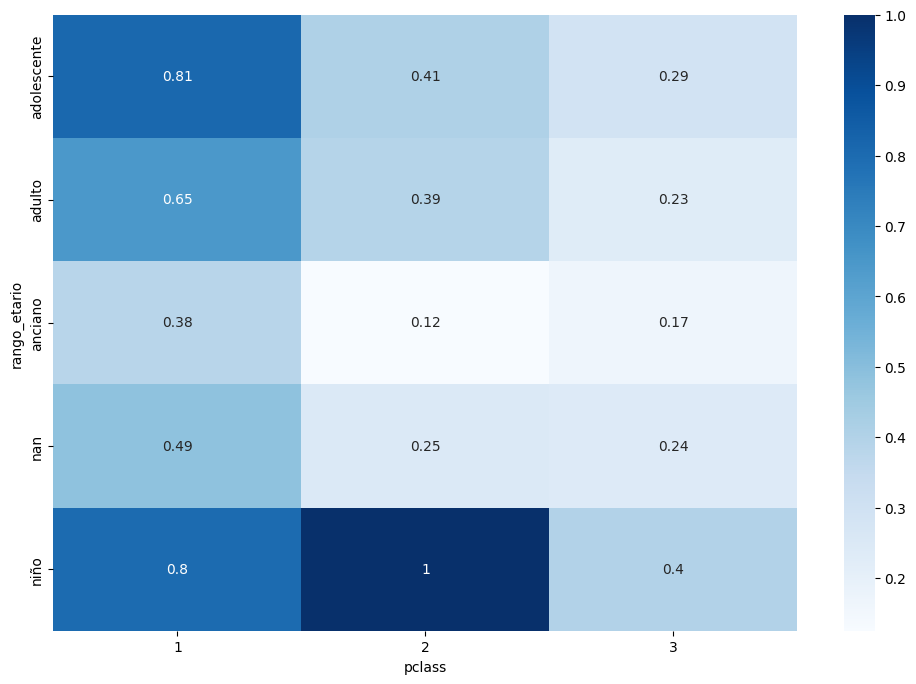

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cross = pd.crosstab(df['rango_etario'],df['pclass'], values=df['survived'], aggfunc='mean')

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(cross, cmap= 'Blues', annot=True)

---


### **Guardamos el Dataframe**


---

**En un CSV**

In [ ]:
df_merge.to_csv('output.csv',index=False)

**En un Google Spreadsheet**

In [ ]:
# Dirección del archivo
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/16AiilYU0DbGnEoQsvPuLtRjLpDaK4dMOmrgSAGnyyp4')

# Especifico Hoja del Spreadsheet
sheet = wb.worksheet('output')

# Elimino el contenido anterior
sheet.clear()

# Guardo el dataframe
set_with_dataframe(sheet, df_merge, include_index=False)

---


### **Ejercicios**


---

¿Cuál es el precio promedio que se pagó por un Ticket? (Fare)

¿Que le sucedió a la pasajera Mabel Skoog?